In [2]:
import pickle as pk
import pandas as pd
import numpy as np
import copy

data=pd.read_csv("./Data/BankChurners.csv")

data['Attrition_Flag'] = data['Attrition_Flag'].map({1: 'Existing Customer', 0: 'Attrited Customer'})


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# # print)str
# scaled_x_train=pd.read_csv("./Data/scaled_x_train_smote2.csv")
# scaled_x_test=pd.read_csv("./Data/scaled_x_test_smote2.csv")
# # pd.read_csv("./Data/scaled_x_test_smote2.csv")
# scaled_x_cv=pd.read_csv("./Data/scaled_x_cv_smote2.csv")

y_test_copy=pd.read_csv("./Data/y_test_smote3.csv")
x_test=pd.read_csv("./Data/x_test_smote3.csv")

X_train_res=pd.read_csv("./Data/X_train_res_smote3.csv")
y_train_res=pd.read_csv("./Data/y_train_res_smote3.csv")

X_train_res=X_train_res.drop('Unnamed: 0',axis=1)
y_train_res=y_train_res.drop('Unnamed: 0',axis=1)
x_test=x_test.drop('Unnamed: 0',axis=1)


y_test_copy=y_test_copy.drop('Unnamed: 0',axis=1)
# scaled_x_test=scaled_x_test.drop('Unnamed: 0',axis=1)
# scaled_x_cv=scaled_x_cv.drop('Unnamed: 0',axis=1)


y_test=y_test_copy

y_valid=pd.read_csv("./Data/y_valid_smote3.csv")
x_valid=pd.read_csv("./Data/x_valid_smote3.csv")

x_valid=x_valid.drop('Unnamed: 0',axis=1)
y_valid=y_valid.drop('Unnamed: 0',axis=1)

y_valid.shape




y_train_res['Attrition_Flag']=y_train_res['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
y_valid['Attrition_Flag']=y_valid['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
y_test_copy['Attrition_Flag']=y_test_copy['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})



In [4]:
#  Scaling features
scaler = StandardScaler()
scaler.fit(X_train_res)

scaled_x_train = scaler.transform(X_train_res)
scaled_x_test = scaler.transform(x_test)


scaled_x_valid=scaler.transform(x_valid)
# scaled_y_cv =scaler.transform(y_cv)

scaled_x_train.shape


scaled_x_train.shape

(7675, 32)

In [6]:
from sklearn.decomposition import KernelPCA
transformer = KernelPCA(n_components = 5, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
IndependentComponentValues = transformer.fit_transform(scaled_x_train)

# X_preimage7 = transformer.inverse_transform(IndependentComponentValues)
# rmse = mean_squared_error(scaled_x_train,X_preimage7 ,squared=False)
# print("RMSE: {} with {} components".format(rmse, 7))


In [7]:
icaTestData=transformer.transform(scaled_x_test)
icavalidData=transformer.transform(scaled_x_valid)

In [6]:
# pca_reload = pk.load(open("pca_finalDF_data1.pkl",'rb'))
# result_new = pca_reload .transform(X)

In [7]:
# pca_reload.shape

In [8]:
def create_model(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.Dense(8, activation=activation))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model


In [9]:

import joblib

# joblib.dump(DTmodel, 'DTgrid_NLP.pkl')

from sklearn import metrics

# tfidf_vector_X = xtrain_tfidf_ngram.toarray()  #//shape - (3,6)
# tfidf_vector_valid= xvalid_tfidf_ngram.toarray() #//shape - (3,6)
# tfidf_vector_X = tfidf_vector_X[:, :, None] #//shape - (3,6,1) 
# tfidf_vector_valid = tfidf_vector_valid[:, :, None] #//shape - (3,6,1)


# tfidf_vector_X.shape[1:]

from tensorflow import keras
from tensorflow.keras import layers

# input_shape= [x_train.shape[1]]

# NNmodel = create_model(optimizer='adam', activation = 'sigmoid', hidden_layers=1,learning_rate=0.01)




from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


In [10]:
# sess.run(optimizer._lr)
def create_modelWithDropBatch(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(8, activation='relu'))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model



In [11]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [12]:
# pca_finalDF.shape
# input_shape

In [13]:




input_shape=[5]
#
model_Batch_drop_relu =  KerasClassifier(build_fn=create_modelWithDropBatch, verbose = False)  

param_grid={'learning_rate':[0.1,0.001,0.01,0.05,0.05,0.5],'hidden_layers':[2,4,6,8,10]}

gridNN_Batch_drop_relu = GridSearchCV(estimator = model_Batch_drop_relu, param_grid = param_grid)

model_Batch_drop_relu.get_params()

history_Batch_drop_relu = gridNN_Batch_drop_relu.fit(
     IndependentComponentValues, y_train_res,
    validation_data=(icavalidData, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)

print(history_Batch_drop_relu.best_params_)

print(history_Batch_drop_relu.best_score_)
# print(grid.best_params_)

{'hidden_layers': 4, 'learning_rate': 0.1}
0.8737459301948547


In [14]:
import timeit

start = timeit.default_timer()

#Your statements here

bestNN=create_modelWithDropBatch(hidden_layers= 4, learning_rate= 0.1)
history2 = bestNN.fit(
     IndependentComponentValues, y_train_res,
    validation_data=(icavalidData, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)
stop = timeit.default_timer()

print('Time: ', stop - start)  



Epoch 1/200
15/15 [==============================] - 2s 24ms/step - loss: 0.6739 - accuracy: 0.6332 - val_loss: 0.4504 - val_accuracy: 0.8327
Epoch 2/200
15/15 [==============================] - 0s 10ms/step - loss: 0.4940 - accuracy: 0.7754 - val_loss: 0.4571 - val_accuracy: 0.8327
Epoch 3/200
15/15 [==============================] - 0s 8ms/step - loss: 0.4342 - accuracy: 0.8260 - val_loss: 1.0978 - val_accuracy: 0.8327
Epoch 4/200
15/15 [==============================] - 0s 9ms/step - loss: 0.4259 - accuracy: 0.8288 - val_loss: 0.6918 - val_accuracy: 0.8327
Epoch 5/200
15/15 [==============================] - 0s 14ms/step - loss: 0.4060 - accuracy: 0.8422 - val_loss: 0.5433 - val_accuracy: 0.8327
Epoch 6/200
15/15 [==============================] - 0s 9ms/step - loss: 0.4127 - accuracy: 0.8425 - val_loss: 0.7169 - val_accuracy: 0.8327
Epoch 7/200
15/15 [==============================] - 0s 9ms/step - loss: 0.4059 - accuracy: 0.8428 - val_loss: 0.4511 - val_accuracy: 0.8327
Epoch 8/20

15/15 [==============================] - 0s 9ms/step - loss: 0.3678 - accuracy: 0.8557 - val_loss: 0.3456 - val_accuracy: 0.8653
Epoch 59/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3570 - accuracy: 0.8673 - val_loss: 0.3479 - val_accuracy: 0.8692
Epoch 60/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3722 - accuracy: 0.8495 - val_loss: 0.3670 - val_accuracy: 0.8643
Epoch 61/200
15/15 [==============================] - 0s 10ms/step - loss: 0.3593 - accuracy: 0.8648 - val_loss: 0.3570 - val_accuracy: 0.8672
Epoch 62/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3618 - accuracy: 0.8566 - val_loss: 0.3447 - val_accuracy: 0.8756
Epoch 63/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3473 - accuracy: 0.8681 - val_loss: 0.3476 - val_accuracy: 0.8707
Epoch 64/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3482 - accuracy: 0.8676 - val_loss: 0.3375 - val_accuracy: 0.8731
Epoch 65/200
15/15

15/15 [==============================] - 0s 8ms/step - loss: 0.3419 - accuracy: 0.8674 - val_loss: 0.3291 - val_accuracy: 0.8722
Epoch 116/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3410 - accuracy: 0.8730 - val_loss: 0.3364 - val_accuracy: 0.8712
Epoch 117/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3337 - accuracy: 0.8683 - val_loss: 0.3405 - val_accuracy: 0.8687
Epoch 118/200
15/15 [==============================] - 0s 10ms/step - loss: 0.3324 - accuracy: 0.8752 - val_loss: 0.3293 - val_accuracy: 0.8736
Epoch 119/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3357 - accuracy: 0.8727 - val_loss: 0.3456 - val_accuracy: 0.8702
Epoch 120/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3310 - accuracy: 0.8643 - val_loss: 0.3380 - val_accuracy: 0.8741
Epoch 121/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3309 - accuracy: 0.8709 - val_loss: 0.3351 - val_accuracy: 0.8712
Epoch 122/20

15/15 [==============================] - 0s 8ms/step - loss: 0.3243 - accuracy: 0.8775 - val_loss: 0.3213 - val_accuracy: 0.8741
Epoch 173/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3426 - accuracy: 0.8709 - val_loss: 0.3378 - val_accuracy: 0.8687
Epoch 174/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3300 - accuracy: 0.8708 - val_loss: 0.3340 - val_accuracy: 0.8731
Epoch 175/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3268 - accuracy: 0.8717 - val_loss: 0.3541 - val_accuracy: 0.8707
Epoch 176/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3472 - accuracy: 0.8677 - val_loss: 0.3501 - val_accuracy: 0.8648
Epoch 177/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3390 - accuracy: 0.8700 - val_loss: 0.3320 - val_accuracy: 0.8766
Epoch 178/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3369 - accuracy: 0.8740 - val_loss: 0.3189 - val_accuracy: 0.8766
Epoch 179/200

In [15]:

def plotconfusionMatrix(modelObj,ytest,xtest):
#     model_DecTreeClass2.fit(X_train_res, y_train_res)
    y_pred_DecTreeClass2 = modelObj.predict_classes(xtest)
    conf_mat2 = metrics.confusion_matrix(ytest, y_pred_DecTreeClass2)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat2,annot=True)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual class")
    plt.show()
    print('Confusion matrix: \n', conf_mat2)
    print('TP: ', conf_mat2[1,1])
    print('TN: ', conf_mat2[0,0])
    print('FP: ', conf_mat2[0,1])
    print('FN: ', conf_mat2[1,0])

def getMetrics(modelObj,xTrain,yTrain,xValid,yValid):
    y_pred_DecTreeClass2 = modelObj.predict_classes(xValid)
    print('Classification report: \n', metrics.classification_report(yValid, y_pred_DecTreeClass2))
    print('Training Accuracy_Score:',metrics.accuracy_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    print('Training Precision:',metrics.precision_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    print('Training Recall:',metrics.recall_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    
    print('Training F1 Score:',metrics.f1_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')

    
    print('Validation Accuracy_Score:',metrics.accuracy_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Precision:',metrics.precision_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Recall:',metrics.recall_score(yValid, y_pred_DecTreeClass2)*100,'%')
    
    print('Validation F1 Score:',metrics.f1_score(yValid, y_pred_DecTreeClass2)*100,'%')



<AxesSubplot:title={'center':'Accuracy'}>

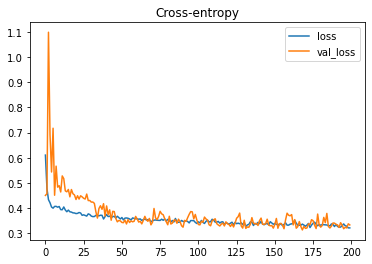

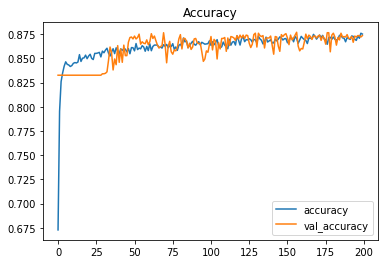

In [16]:
history_df = pd.DataFrame(history2.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")




/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


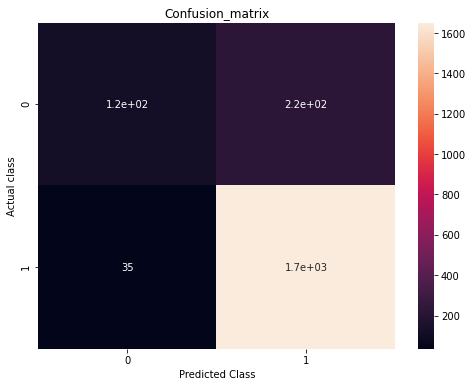

Confusion matrix: 
 [[ 118  221]
 [  35 1652]]
TP:  1652
TN:  118
FP:  221
FN:  35
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.35      0.48       339
           1       0.88      0.98      0.93      1687

    accuracy                           0.87      2026
   macro avg       0.83      0.66      0.70      2026
weighted avg       0.86      0.87      0.85      2026



/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training Accuracy_Score: 88.69055374592834 %
Training Precision: 86.6609145815358 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training Recall: 98.14344342388118 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training F1 Score: 92.04545454545455 %
Validation Accuracy_Score: 87.36426456071075 %
Validation Precision: 88.20074746396156 %
Validation Recall: 97.9253112033195 %
Validation F1 Score: 92.80898876404494 %


In [17]:
plotconfusionMatrix(bestNN,y_valid['Attrition_Flag'],icavalidData)

getMetrics(bestNN,IndependentComponentValues,y_train_res['Attrition_Flag'],icavalidData,y_valid['Attrition_Flag'])